**THE SPARKS FOUNDATION**

**TASK 1: PREDICTION USING SUPERVISED ML**
(Level-Beginner)

● Predict the percentage of an student based on the no. of study hours. 

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool 

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day? 

● Sample Solution : https://bit.ly/2HxiGGJ




**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading and analyzing the data
data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see there are no null values

**Visualizing the data**

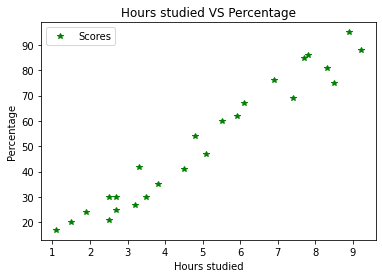

In [8]:
data.plot(x='Hours',y='Scores',color='green',style='*')
plt.title('Hours studied VS Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()

**Preparing the Model**

In [9]:
#defining x and y from the data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
#splitting the data by using Scikit-Learn's built in train_test_split()method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

**Training the Model**

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
#fitting the training data
lr.fit(x_train,y_train)
print("Fitting finished")

Fitting finished


In [15]:
#printing the intercept and slope of the regression line fitted
print("Intercept =",lr.intercept_,"\nSlope of the regression =",lr.coef_)

Intercept = 1.9322042531516601 
Slope of the regression = [9.94167834]


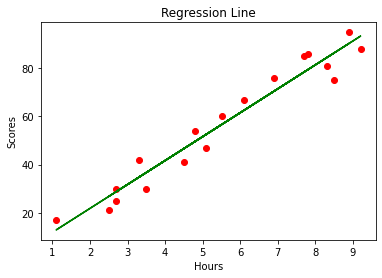

In [16]:
#plotting the Regression Line
p = lr.intercept_ + lr.coef_ *x_train
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,p,color='green')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression Line")
plt.show()

**Testing the data**

In [17]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [18]:
#predicting the Scores for test data
y_pred = lr.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [19]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

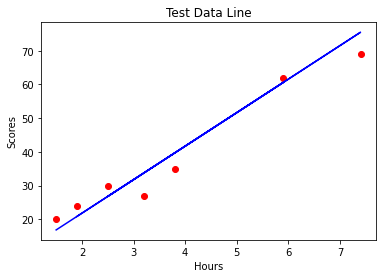

In [20]:
#plotting on test data line
plt.plot(x_test,y_pred,color='blue')
plt.scatter(x_test,y_test,color='red',marker='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Test Data Line")
plt.show()

**Comparing Actual VS Predicted Scores**

In [21]:
y_test_list = list(y_test)
prediction = list(y_pred)
compare = pd.DataFrame({'Actual Scores':y_test_list,'Precdicted Scores':prediction})
compare

,Actual Scores,Precdicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Accuracy of the Model**

In [22]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9367661043365056

**Predicting the Model**

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = metrics.mean_squared_error(y_test,y_pred)
root_mse = np.sqrt(mse)
mas = root_mse
print("Mean Squared Error =",mse)
print("Root Mean Squared Error",root_mse)
print("Mean Absolute Error",mas)

Mean Squared Error = 20.33292367497996
Root Mean Squared Error 4.509204328368805
Mean Absolute Error 4.509204328368805


**Predicting the Score**

In [24]:
#What will be predicted score if a student studies for 9.25 hrs/ day? 
Predict_score = lr.predict([[9.25]]) 
print("Predicted score for a student studying 9.25 hours :",Predict_score)

Predicted score for a student studying 9.25 hours : [93.89272889]


**Conclusion**

*So we can say that if a student studies for 9.25 hours then the student will score **93.89** marks.*